In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]

In [4]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [5]:
# 8 * 8 모양 이미지
data[0].shape

(64,)

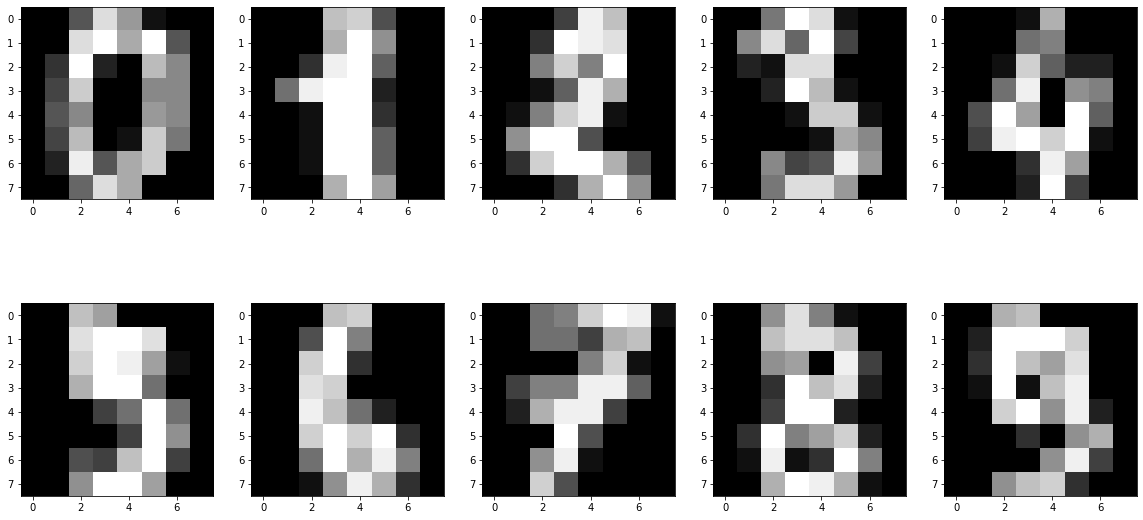

In [6]:
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

In [7]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
scaled_data = scaler.fit_transform(data)

In [9]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()

In [10]:
# 학습
pca.fit(scaled_data)

PCA()

In [11]:
# 설명된 분산
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

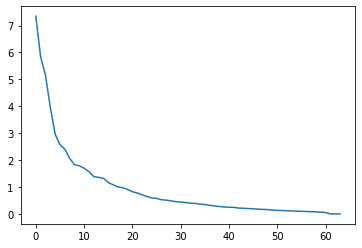

In [12]:
plt.plot(pca.explained_variance_)

In [13]:
# 설명된 분산의 비율
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

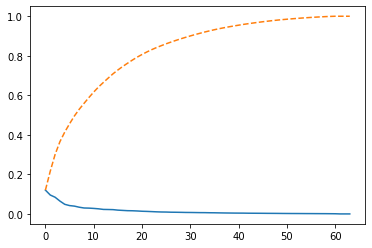

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--")

In [15]:
# 제한된 PCA
# 비율로 사용하는 방법
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_data)

PCA(n_components=0.8)

In [16]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [17]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

In [18]:
# 선택된 주성분의 개수
ratio_pca.n_components_

21

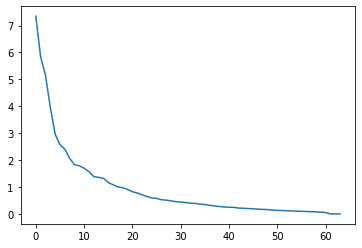

In [19]:
# 개수를 지정해서 사용하는 방법
plt.plot(pca.explained_variance_)

In [20]:
# elbow point 8
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_data)

PCA(n_components=8)

In [21]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561053, 0.08444413, 0.06498369, 0.0485998 ,
       0.04213966, 0.03941893, 0.0338796 ])

In [22]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594969, 0.30039382, 0.3653775 , 0.41397731,
       0.45611696, 0.49553589, 0.52941549])

In [23]:
n_comp_pca.n_components_

8

In [24]:
# PCA를 이용한 시각화 - 2 or 3차원
viz_pca = PCA(n_components=2)
viz_pca_latent = viz_pca.fit_transform(scaled_data)

In [25]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(target):
        index = target == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

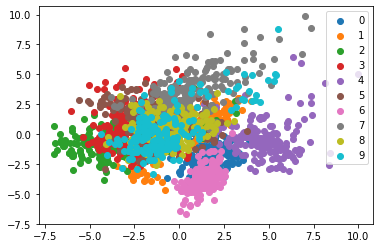

In [26]:
visualize_latent_space_with_label(viz_pca_latent)

In [27]:
# LDA - 학습할 때 label을 줌(지도학습)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [28]:
lda.fit(scaled_data, target)

LinearDiscriminantAnalysis()

In [29]:
# 설명된 분산
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

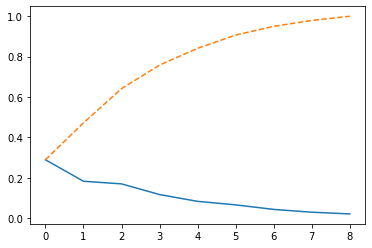

In [30]:
plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--")

In [31]:
# 시각화
viz_lda = LinearDiscriminantAnalysis(n_components=2)
viz_lda_latent = viz_lda.fit_transform(scaled_data, target)

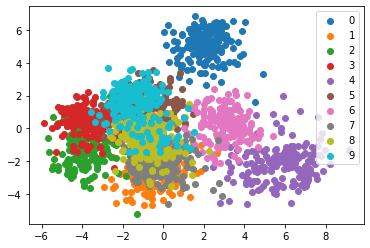

In [32]:
visualize_latent_space_with_label(viz_lda_latent)

In [33]:
# T-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [34]:
# 시각화
tsne_latent = tsne.fit_transform(scaled_data)

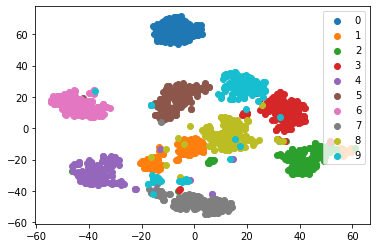

In [35]:
visualize_latent_space_with_label(tsne_latent)

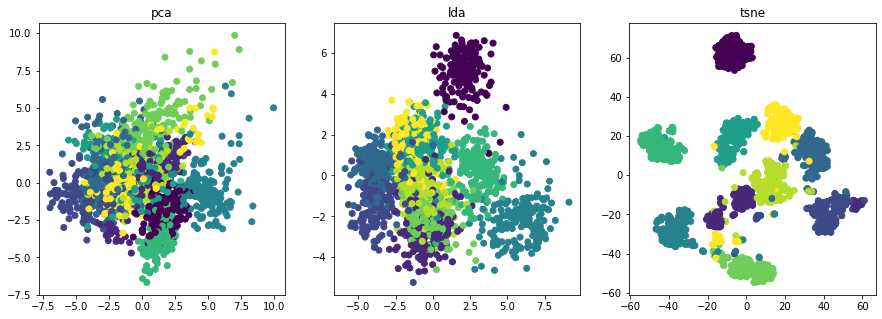

In [36]:
# 비교
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
latents = [
    ("pca", viz_pca_latent),
    ("lda", viz_lda_latent),
    ("tsne", tsne_latent)
]
for idx, (name, latent) in enumerate(latents):
    ax = axes[idx]
    ax.scatter(latent[:, 0], latent[:, 1], c=target)
    ax.set_title(name)